# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set matplotlib to display plots inline
%matplotlib inline

# Loading the given database into pandas
pet_supplies = pd.read_csv("pet_supplies_2212.csv")
print(pet_supplies)
# Checking the number of records
print(pet_supplies.shape)



      product_id   category animal  ...    sales rating  repeat_purchase
0              1       Food   Bird  ...  1860.62    7.0                1
1              2    Housing   Bird  ...   963.60    6.0                0
2              3       Food    Dog  ...   898.30    5.0                1
3              4   Medicine    Cat  ...   982.15    6.0                1
4              5    Housing    Cat  ...   832.63    7.0                1
...          ...        ...    ...  ...      ...    ...              ...
1495        1496       Food   Bird  ...  1203.36    5.0                0
1496        1497  Equipment    Dog  ...  1099.97    5.0                0
1497        1498       Food   Fish  ...   724.02    3.0                0
1498        1499   Medicine   Fish  ...   658.66    5.0                1
1499        1500       Food    Cat  ...   826.08    4.0                1

[1500 rows x 8 columns]
(1500, 8)


In [3]:
# Checking null counts and data types
print(pet_supplies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB
None


In [5]:
# Changing all values in the 'size' column to lowercase
pet_supplies['size'] = pet_supplies['size'].str.lower()

# Displaying the first few rows
print(pet_supplies.head())

   product_id  category animal    size  price    sales  rating  repeat_purchase
0           1      Food   Bird   large   51.1  1860.62     7.0                1
1           2   Housing   Bird  medium  35.98   963.60     6.0                0
2           3      Food    Dog  medium  31.23   898.30     5.0                1
3           4  Medicine    Cat   small  24.95   982.15     6.0                1
4           5   Housing    Cat   small  26.18   832.63     7.0                1


In [6]:
# Converting product IDs to strings
pet_supplies['product_id'] = pet_supplies['product_id'].astype(str)

# Checking unique values in the 'price' column
print(pet_supplies['price'].unique())

['51.1' '35.98' '31.23' '24.95' '26.18' '30.77' '31.04' '28.9' '17.82'
 '24.93' '40.87' '34.96' '31.07' '40.8' '33.13' '43.09' '28.29' '43.91'
 '33.87' '44' 'unlisted' '41' '32.98' '22.99' '38.99' '45.83' '28.24'
 '28.19' '27.79' '38.86' '22.89' '26.07' '28.02' '23.99' '28.25' '30.87'
 '28.09' '29.01' '26.13' '54.03' '31.2' '30.92' '20.95' '17.98' '27.7'
 '24.8' '31.09' '19.83' '33.15' '21.25' '38.06' '30.89' '35.04' '26.03'
 '33.94' '25.81' '32.99' '17.9' '30.96' '40.93' '24.98' '26.08' '23.08'
 '26' '22.95' '39.03' '23.19' '31' '21.05' '31.5' '24.7' '27.76' '18.06'
 '28.43' '43.99' '41.03' '28.28' '25.96' '27.86' '38.95' '36.22' '23.02'
 '21.14' '42.99' '27.95' '38' '28.2' '39.16' '25.07' '15' '35.95' '30.03'
 '22.98' '27.97' '28.74' '26.05' '45.99' '25.83' '22.75' '28.03' '29.02'
 '26.32' '27.99' '34.18' '21.07' '25.97' '23.14' '42.85' '34.08' '22.97'
 '24.24' '41.02' '41.04' '22.68' '24.83' '27.77' '50.92' '41.01' '36.08'
 '21.12' '16.11' '29.99' '34.17' '19.76' '30.86' '24.94' '51

Unlisted variable in the price column

In [7]:
# Replacing 'unlisted' values with 0 in the 'price' column
pet_supplies['price'].replace('unlisted', '0', inplace=True)

# Converting price type to float
pet_supplies['price'] = pet_supplies['price'].astype(float)

# Displaying descriptive statistics of the 'price' column
print(pet_supplies['price'].describe())

count    1500.000000
mean       26.481873
std        11.472570
min         0.000000
25%        22.910000
50%        27.930000
75%        33.142500
max        54.160000
Name: price, dtype: float64


In [8]:
# Replacing 0 values with the median (27.93) in the 'price' column
pet_supplies['price'].replace(0, 27.93, inplace=True)

# Checking unique values in the 'rating' column
print(pet_supplies['rating'].unique())

[ 7.  6.  5.  4.  8.  1.  3. nan  2.  9.]


anamoly notied: nan

In [10]:
# Replacing nan value with 0 in the 'rating' column
pet_supplies['rating'].replace(np.nan, 0, inplace=True)
pet_supplies['rating'] = pet_supplies['rating'].astype(int)

# Converting 'repeat_purchase' column to string
pet_supplies['repeat_purchase'] = pet_supplies['repeat_purchase'].astype(str)

# Double checking DB
print(pet_supplies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   object 
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 93.9+ KB
None


In [11]:
# Checking unique values in the 'category' column
print(pet_supplies['category'].unique())

['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']


Notice category labeled '-'

In [13]:
# Replacing '-' with 'Unknown' in the 'category' column
pet_supplies['category'].replace('-', 'Unknown', inplace=True)

# Saving updated data to a new CSV file
pet_supplies.to_csv('pet_suppliesUpdated.csv', index=False)

#Check DB again
print(pet_supplies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   object 
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 93.9+ KB
None


## Task 2

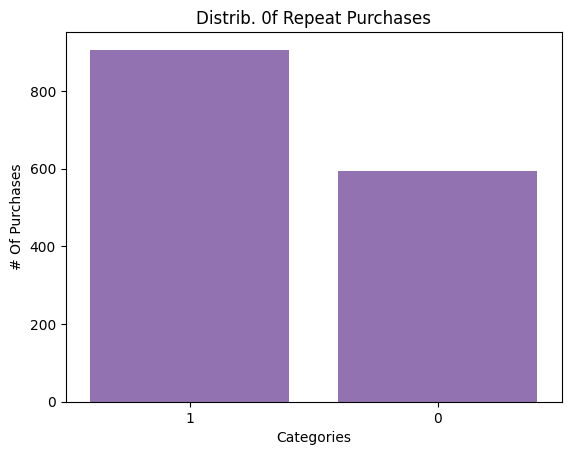

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette()  # Accessing the default color palette
light_purple = palette[4]  # Extracting the light purple color from the palette

sns.countplot(data=pet_supplies, x='repeat_purchase', color=light_purple)  # Creating the count plot with the light purple color

plt.title('Distrib. 0f Repeat Purchases')
plt.ylabel('# Of Purchases')
plt.xlabel('Categories')
plt.show()


The # of repeat purchases was higher, with over 800 purchases

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       906 non-null    object 
 1   category         906 non-null    object 
 2   animal           906 non-null    object 
 3   size             906 non-null    object 
 4   price            906 non-null    float64
 5   sales            906 non-null    float64
 6   rating           906 non-null    int64  
 7   repeat_purchase  906 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 63.7+ KB
None


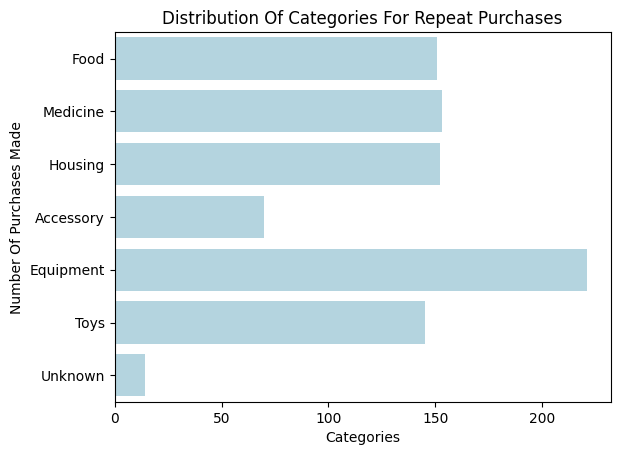

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the pet_supplies DataFrame to include only repeat purchases
new_pet = pet_supplies.loc[pet_supplies['repeat_purchase'] == '1']

# Displaying information about the new_pet DataFrame
print(new_pet.info())
# Total of 906 records that were repeat purchases

# Creating a count plot to visualize the distribution of categories for repeat purchases
sns.countplot(data=new_pet, y='category', color='lightblue')

plt.title('Distribution Of Categories For Repeat Purchases')
plt.ylabel('Number Of Purchases Made')
plt.xlabel('Categories')
plt.show()


The distribution of categories among repeat purchases is uneven. Among the repeat purchases, Equipment has the highest frequency, followed by Food, Medicine, Housing, and Toys. On the other hand, the Unknown category has the lowest frequency, indicating it is the least purchased category.

## Task 3

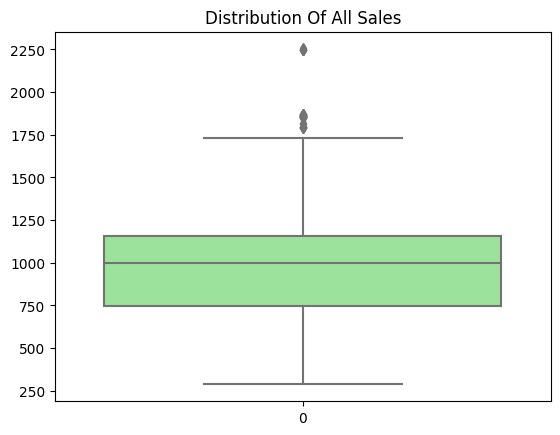

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot to visualize the distribution of sales with light green color
sns.boxplot(data=pet_supplies['sales'], color='lightgreen')
plt.title('Distribution Of All Sales')
plt.show()


The min # of sales was ~250, the max # of sales was ~1750 with some outliers denoted by the points above the max value, & the median # of sales was ~1000

## Task 4

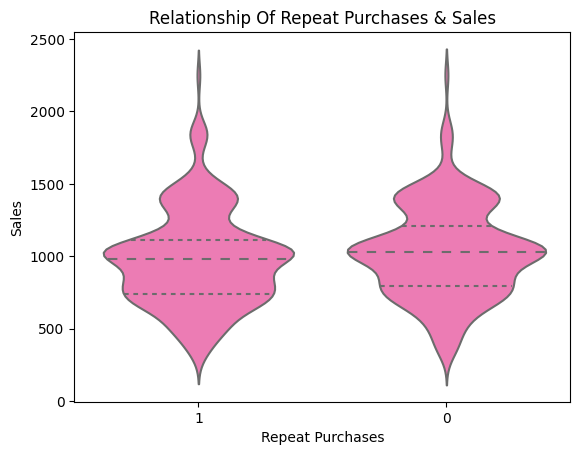

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a violin plot to visualize the relationship between repeat purchases and sales with hot pink color
sns.violinplot(data=pet_supplies, x='repeat_purchase', y='sales', color='hotpink', inner='quartile')

plt.title('Relationship Of Repeat Purchases & Sales')  # Adding a title to the plot
plt.ylabel('Sales')  # Adding a label to the y-axis
plt.xlabel('Repeat Purchases')  # Adding a label to the x-axis
plt.show()


The distribution of sales is comparable between repeat purchases and one-off purchases.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam